Для добавленной в 4-й лабораторной работе таблицы создайте любой триггер. 

In [ ]:
-- Создаем таблицу для логов изменений зарплаты
CREATE TABLE IF NOT EXISTS professor_salary_log (
    log_id SERIAL PRIMARY KEY,
    professor_id INTEGER,
    old_salary MONEY,
    new_salary MONEY,
    change_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

CREATE OR REPLACE FUNCTION increase_salary_by_percentage(
    p_professor_id INTEGER,
    p_percentage NUMERIC
)
RETURNS VOID AS $$
DECLARE
    v_old_salary MONEY;
    v_new_salary MONEY;
BEGIN
    SELECT salary INTO v_old_salary
    FROM professors
    WHERE professor_id = p_professor_id;

    IF NOT FOUND THEN
        RAISE NOTICE 'Профессор с ID % не найден.', p_professor_id;
        RETURN;
    END IF;

    -- Рассчитываем новую зарплату
    v_new_salary := v_old_salary::NUMERIC * (1 + p_percentage / 100);

    -- Обновляем зарплату
    UPDATE professors
    SET salary = v_new_salary
    WHERE professor_id = p_professor_id;

    -- Логируем изменение
    INSERT INTO professor_salary_log (professor_id, old_salary, new_salary)
    VALUES (p_professor_id, v_old_salary, v_new_salary);
END;
$$ LANGUAGE plpgsql;


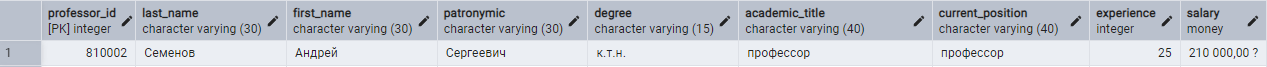

In [ ]:
SELECT increase_salary_by_percentage(810002, 21);
